<h1 align=center> Topic Classification with Tensorflow and Keras</h1>

### **Project Overview and Import Modules**

In [1]:
%tensorflow_version 2.x 
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.preprocessing.text import Tokenizer

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.2.0


## **Load the Reuters Dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

8982 train sequences
2246 test sequences


In [4]:
num_classes = np.max(y_train) + 1
print(num_classes, 'classes')

46 classes


## **Vectorize Sequence Data and One-hot Encode Class Labels**

In [5]:
print('Vectorizing sequence data...')
tokenizer = Tokenizer(num_words=10000)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Vectorizing sequence data...
x_train shape: (8982, 10000)
x_test shape: (2246, 10000)


In [6]:
print('Convert class vector to binary class matrix for use with categorical_crossentropy')
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

Convert class vector to binary class matrix for use with categorical_crossentropy
y_train shape: (8982, 46)
y_test shape: (2246, 46)


## **Build Multilayer Perceptron Model**

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               5120512   
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


## **Train Model**

In [9]:
%%time
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',patience=3, verbose=1, mode='min', baseline=None, restore_best_weights=False)
callbacks = [early_stopping]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

CPU times: user 16.7 ms, sys: 0 ns, total: 16.7 ms
Wall time: 19.1 ms


In [10]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Epoch 1/20
253/253 [==============================] - 1s 5ms/step - loss: 1.2941 - accuracy: 0.7237 - val_loss: 0.9599 - val_accuracy: 0.7976
Epoch 2/20
253/253 [==============================] - 1s 4ms/step - loss: 0.5024 - accuracy: 0.8832 - val_loss: 0.8490 - val_accuracy: 0.8198
Epoch 3/20
253/253 [==============================] - 1s 4ms/step - loss: 0.2775 - accuracy: 0.9370 - val_loss: 0.9422 - val_accuracy: 0.8120
Epoch 4/20
253/253 [==============================] - 1s 4ms/step - loss: 0.2222 - accuracy: 0.9472 - val_loss: 0.9749 - val_accuracy: 0.8009
Epoch 5/20
253/253 [==============================] - 1s 4ms/step - loss: 0.1973 - accuracy: 0.9530 - val_loss: 0.9535 - val_accuracy: 0.8053
Epoch 00005: early stopping


## **Evaluate Model on Test Data**

In [11]:
score = model.evaluate(x_test, y_test, batch_size=32, verbose=1)
print('Test loss: {:4f}\nTest Accuracy: {:4f}'.format(score[0], score[1]))

71/71 [==============================] - 0s 3ms/step - loss: 0.9229 - accuracy: 0.8072
Test loss: 0.922945
Test Accuracy: 0.807213


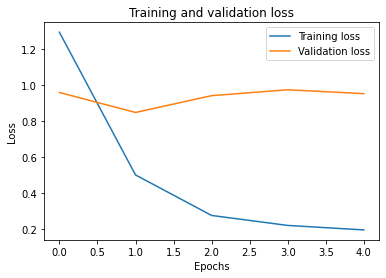

In [12]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

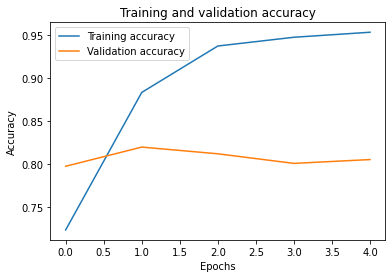

In [13]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()